In [53]:
from seaborn import load_dataset

In [54]:
df = load_dataset("tips")

In [55]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [56]:
import matplotlib.pyplot as plt

In [57]:
import seaborn as sns

<Axes: xlabel='day', ylabel='total_bill'>

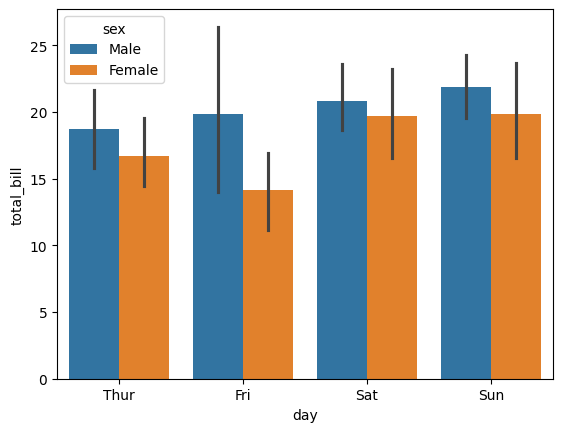

In [58]:
sns.barplot(x="day", y="total_bill", data=df, hue='sex')

<Axes: xlabel='sex', ylabel='total_bill'>

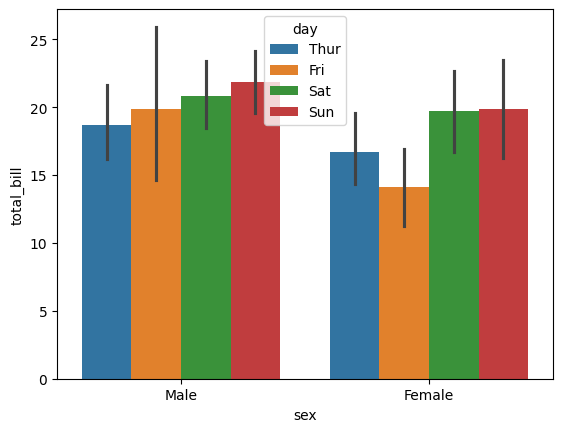

In [59]:
sns.barplot(x="sex", y="total_bill", data=df, hue='day')

<Axes: xlabel='total_bill', ylabel='Count'>

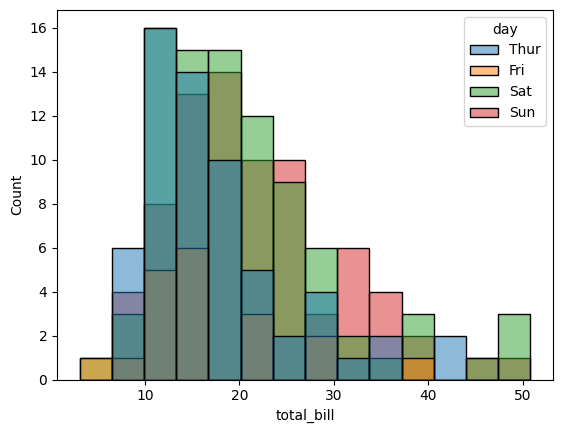

In [60]:
sns.histplot(x="total_bill", data=df, hue='day')

In [61]:
df.groupby('sex').count()

/tmp/ipykernel_13355/2450831828.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex').count()


,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,157,157,157,157,157,157
Female,87,87,87,87,87,87


<Axes: xlabel='total_bill', ylabel='tip'>

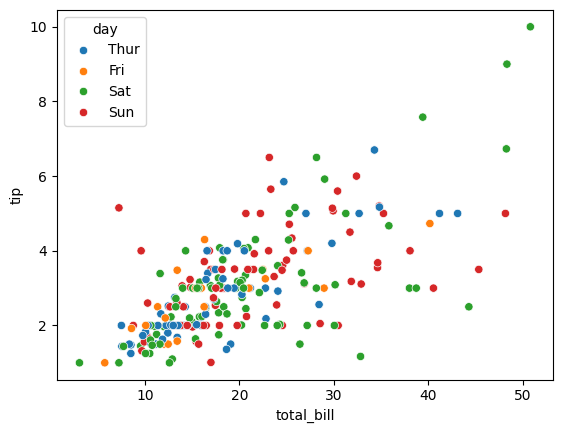

In [62]:
sns.scatterplot(x="total_bill", y="tip", data=df, hue='day')

/tmp/ipykernel_13355/3846873586.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.pie(df.groupby('sex').count()['tip'],autopct='%1.2f')


([<matplotlib.patches.Wedge at 0x7feeb20111c0>,
 [Text(-0.47909437653273873, 0.9901861331965351, ''),
  Text(0.47909422701878684, -0.990186205537762, '')],
 [Text(-0.2613242053814938, 0.54010152719811, '64.34'),
  Text(0.2613241238284292, -0.5401015666569611, '35.66')])

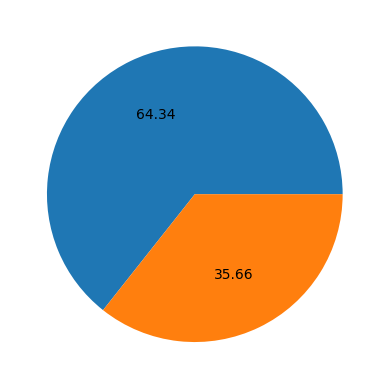

In [63]:
plt.pie(df.groupby('sex').count()['tip'],autopct='%1.2f')

In [64]:
from sklearn.preprocessing import LabelEncoder

# Load the dataset


# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical columns
categorical_cols = ['sex', 'smoker', 'day', 'time']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [65]:
import keras

In [66]:
print(keras.__version__)

3.9.2


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = df.drop(columns=['total_bill'], axis=1)

In [69]:
y= df['total_bill']

In [70]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [71]:
x_train.shape

(163, 6)

In [72]:
x_test.shape

(81, 6)

In [73]:
model = keras.Sequential()
model.add(keras.Input(shape=(6,)))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1, activation='relu'))
model.add(keras.layers.Dense(1, activation='linear'))


In [74]:
model.compile(
    optimizer="adam",
    loss='mse',
    metrics=['mse']
)

In [78]:
model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=1000,
    verbose="auto",
    validation_split=0.1,
)

Epoch 1/1000


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 35.2643 - mse: 35.2643 - val_loss: 55.6809 - val_mse: 55.6809
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 36.6661 - mse: 36.6661 - val_loss: 55.6608 - val_mse: 55.6608
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 39.0183 - mse: 39.0183 - val_loss: 55.6544 - val_mse: 55.6544
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 37.5396 - mse: 37.5396 - val_loss: 55.6748 - val_mse: 55.6748
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 33.3563 - mse: 33.3563 - val_loss: 55.6553 - val_mse: 55.6553
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 33.7588 - mse: 33.7588 - val_loss: 55.6158 - val_mse: 55.6158
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 36.6956 - mse: 36.6956 - val_loss: 55.5916 - val_mse: 55.5916
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 38.2582 - mse: 38.2582 - val_loss: 55.6388 - val_mse: 55.6388
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms

In [79]:
model.evaluate(
    x=x_test,
    y=y_test,
    batch_size=64,
    verbose="auto",
  
)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 37.7798 - mse: 37.7798

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 34.8115 - mse: 34.8115


[33.327362060546875, 33.327362060546875]

In [80]:
model.predict(x_test, batch_size=64, verbose="auto", steps=None, callbacks=None)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[18.28253  ],
       [14.099414 ],
       [19.602009 ],
       [34.030754 ],
       [11.52976  ],
       [18.170183 ],
       [17.111681 ],
       [15.583474 ],
       [18.2917   ],
       [17.053751 ],
       [17.507774 ],
       [12.2838955],
       [10.861298 ],
       [18.170183 ],
       [ 9.2113   ],
       [14.466373 ],
       [24.44663  ],
       [20.643469 ],
       [16.001577 ],
       [29.221087 ],
       [21.763474 ],
       [21.105684 ],
       [24.760235 ],
       [12.215729 ],
       [25.8002   ],
       [15.851309 ],
       [13.2115965],
       [28.802408 ],
       [19.602009 ],
       [33.577255 ],
       [23.009483 ],
       [17.213957 ],
       [20.952929 ],
       [22.185745 ],
       [21.249517 ],
       [21.529556 ],
       [18.023987 ],
       [29.727518 ],
       [16.626919 ],
       [18.22281  ],
       [11.534057 ],
       [13.176089 ],
       [15.974012 ],
       [15.48852  ],
       [15.175335 ],
       [ 8.193735 ],
       [14.499845 ],
       [17.36